# Fourier Transform

* Describe any waveform as the summation of simple sinusoidal signals at various frequencies.
* The Fourier transform of a waveform tells us how much of each frequency component is in the waveform.
* It converts a time domain waveform to a frequency domain signal.
* It is invertable, so we can also convert back from frequency to time domains.
* The concept is also valid for space and spatial frequencies.

![](fourier_comps_2d_2.png)

* Any waveform, even a square pulse, can be built out of sinusoidal signals of varying amplitude and frequency.

![](fourier_comps_2d.png)

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

---
### Simple sine wave.

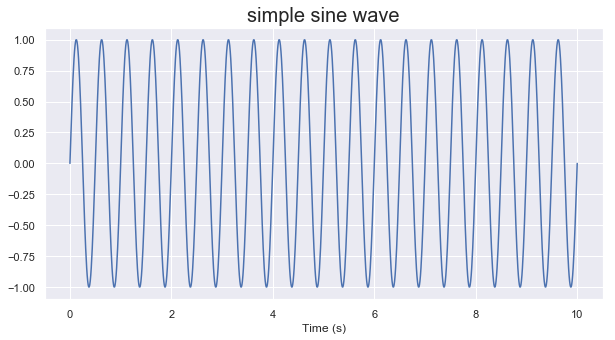

In [22]:
# nice simple sinusoidal waveform at one frequency
time_s = np.linspace(0, 10, 1001)

sin_freq_Hz = 2  # 2 cycles per second

wave = np.sin(2 * np.pi * sin_freq_Hz * time_s)

plt.figure(figsize=(10, 5))
plt.plot(time_s, wave)
plt.xlabel('Time (s)')
plt.title('simple sine wave', fontsize=20);

In [23]:
sample_interval_s = time_s[1] - time_s[0]
sample_freq_Hz = 1 / sample_interval_s
nyquist_freq_Hz = sample_freq_Hz / 2
n_pts = wave.shape[0]

sample_interval_s, sample_freq_Hz, nyquist_freq_Hz, n_pts

(0.01, 100.0, 50.0, 1001)

---
### Fast Fourier Transform (FFT) of simple sinusoid.

FFT algorithms provide significant speedup over straightforward discrete Fourier transform, and are very accurate, so are almost universally used.

((1001,), dtype('complex128'), dtype('float64'))

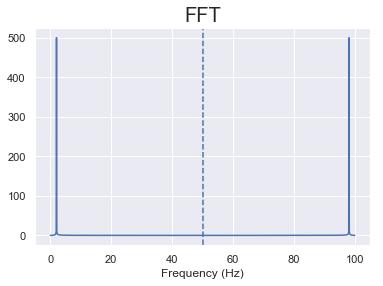

In [24]:
# Fourier transform of the single frequency nice sinusoidal waveform
fft = np.fft.fft(wave)

# frequencies up to 1 / sample_interval
freq_Hz = np.linspace(0, sample_freq_Hz, n_pts)

plt.plot(freq_Hz, np.abs(fft))  # plot absolute value of FFT
plt.axvline(nyquist_freq_Hz, linestyle='dashed')
plt.xlabel('Frequency (Hz)')
plt.title('FFT', fontsize=20)

fft.shape, fft.dtype, np.abs(fft).dtype

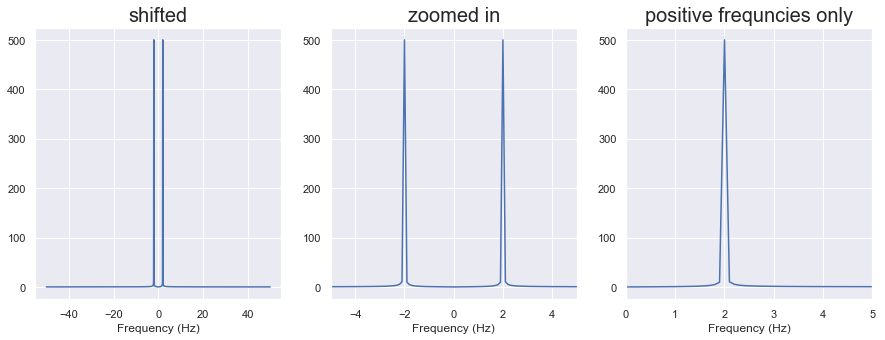

In [25]:
# recall that we can't measure frequencies above Nyquist,
# so the 2nd half of the above plot of the FFT is actually just the symmetric inversion of the 1st half
fft_shifted = np.fft.fftshift(fft)

freq_Hz = np.linspace(-nyquist_freq_Hz, nyquist_freq_Hz, n_pts)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(freq_Hz, np.abs(fft_shifted))
plt.xlabel('Frequency (Hz)')
plt.title('shifted', fontsize=20)

plt.subplot(132)
plt.plot(freq_Hz, np.abs(fft_shifted))
plt.xlim(-5, 5)
plt.xlabel('Frequency (Hz)')
plt.title('zoomed in', fontsize=20)

plt.subplot(133)
plt.plot(freq_Hz, np.abs(fft_shifted))
plt.xlim(0, 5)
plt.xlabel('Frequency (Hz)')
plt.title('positive frequncies only', fontsize=20);

---
### Power spectrum of simple sinusoid.

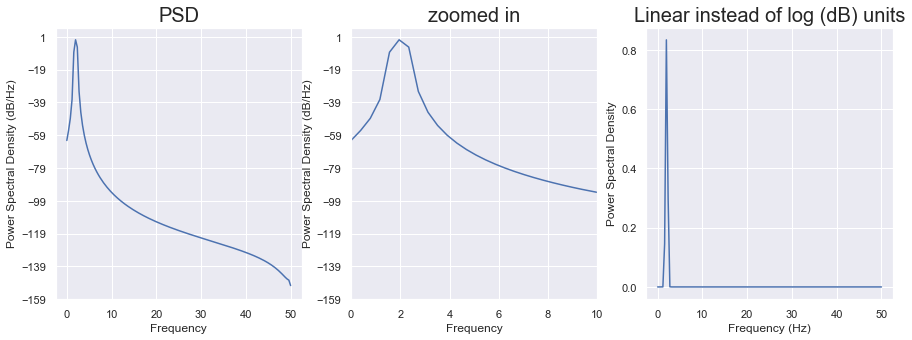

In [26]:
# power spectrum (psd = power spectral density)
plt.figure(figsize=(15, 5))

plt.subplot(131)
Pxx, freqs_Hz = plt.psd(wave, Fs=sample_freq_Hz)
plt.title('PSD', fontsize=20)

plt.subplot(132)
plt.psd(wave, Fs=sample_freq_Hz)
plt.xlim(0, 10)
plt.title('zoomed in', fontsize=20)

plt.subplot(133)
plt.plot(freqs_Hz, Pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Linear instead of log (dB) units', fontsize=20);

---
### Spectrogram of simple sinusoid.

![](spectrogram.png)

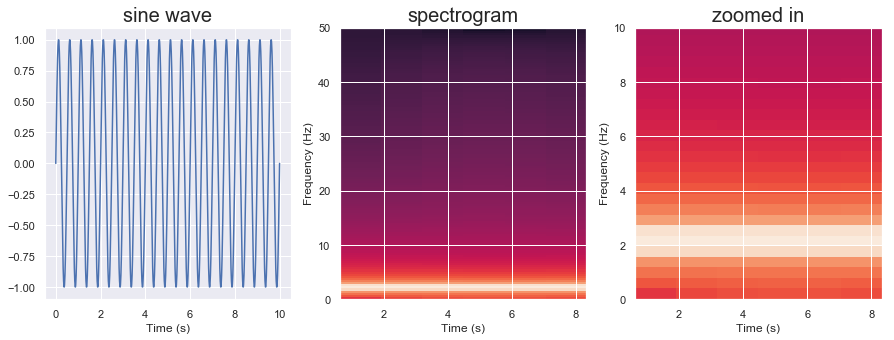

In [27]:
# spectrogram
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(time_s, wave)
plt.xlabel('Time (s)')
plt.title('sine wave', fontsize=20)

plt.subplot(132)
plt.specgram(wave, Fs=sample_freq_Hz)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title('spectrogram', fontsize=20)

plt.subplot(133)
plt.specgram(wave, Fs=sample_freq_Hz)
plt.ylim(0, 10)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title('zoomed in', fontsize=20);

---
### Function with various views of a signal and its frequencies.

In [28]:
def analyze_waveform(wave, sample_freq_Hz, max_freq_Hz=None):
    nyquist_freq_Hz = sample_freq_Hz / 2
    n_pts = wave.shape[0]
    half_pts = n_pts // 2  # // is integer division
    sample_interval_s = 1 / sample_freq_Hz
    time_s = np.arange(0, n_pts) * sample_interval_s

    # only look at first half of fft up to Nyquist frequency
    fft = np.fft.fft(wave)
    fft = fft[:half_pts]
    freq_Hz = np.linspace(0, nyquist_freq_Hz, half_pts)

    fig = plt.figure(figsize=(15, 10))
    
    plt.subplot(221)
    plt.plot(time_s, wave)
    plt.xlabel("Time (s)")
    plt.title('Waveform', fontsize=20)
    
    plt.subplot(222)
    plt.plot(freq_Hz, np.abs(fft))
    if max_freq_Hz is not None:
        plt.xlim(0, max_freq_Hz)
    plt.xlabel('Frequency (Hz)')
    plt.title('FFT', fontsize=20)
    
    plt.subplot(223)
    plt.specgram(wave, Fs=sample_freq_Hz)
    if max_freq_Hz is not None:
        plt.ylim(0, max_freq_Hz)
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.title('Spectrogram', fontsize=20)
    #plt.colorbar()
    
    plt.subplot(224)
    plt.psd(wave, Fs=sample_freq_Hz)
    if max_freq_Hz is not None:
        plt.xlim(0, max_freq_Hz)
    plt.title('PSD', fontsize=20)
    
    fig.tight_layout()

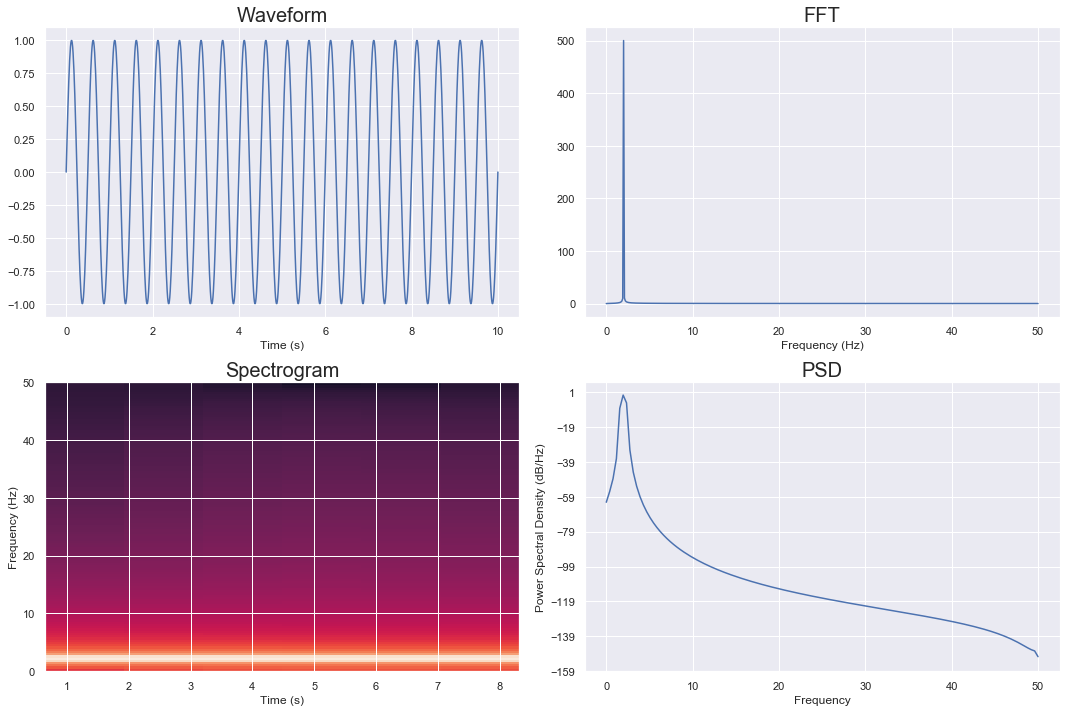

In [29]:
analyze_waveform(wave, sample_freq_Hz)

---
### A waveform composed of differing amounts of multiple frequency components.

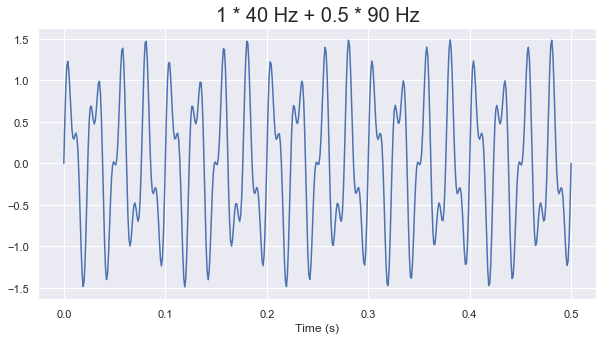

In [178]:
time_s = np.linspace(0, 0.5, 500)
f1_Hz = 40
f2_Hz = 90
A1 = 1
A2 = 0.5
wave = A1 * np.sin(2 * np.pi * f1_Hz * time_s) + A2 * np.sin(2 * np.pi * f2_Hz * time_s)

plt.figure(figsize=(10, 5))
plt.plot(time_s, wave)
plt.xlabel('Time (s)')
plt.title(f'{A1} * {f1_Hz} Hz + {A2} * {f2_Hz} Hz', fontsize=20);

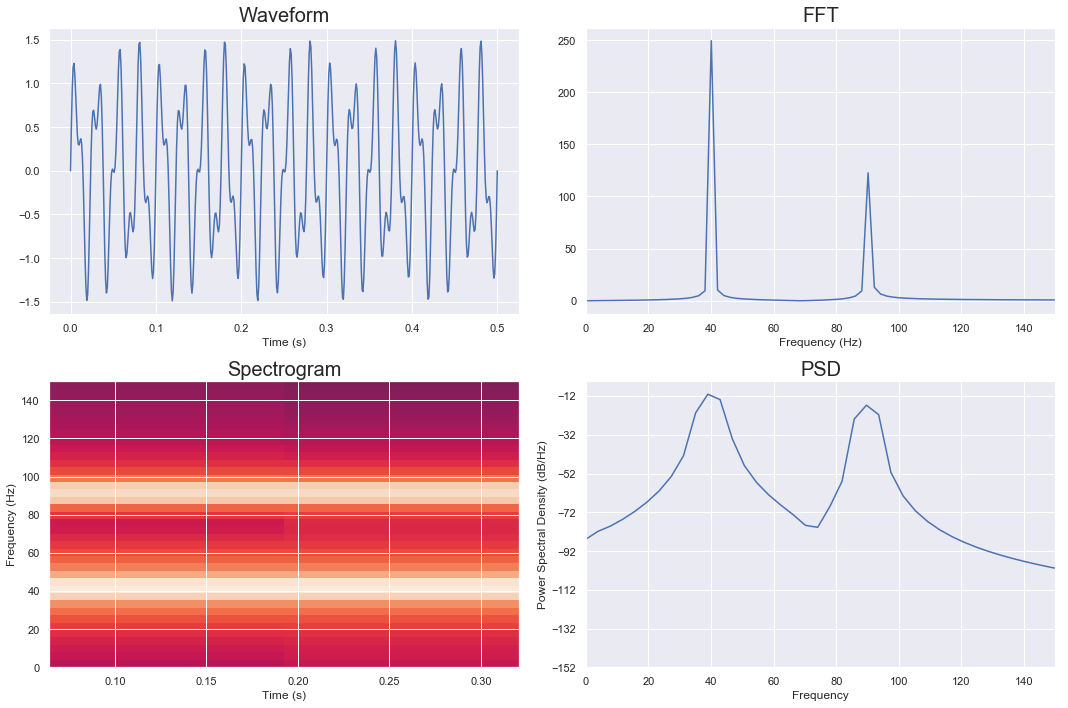

In [179]:
sample_interval_s = time_s[1] - time_s[0]
sample_freq_Hz = 1 / sample_interval_s

analyze_waveform(wave, sample_freq_Hz, 150)

---
### Alter FFT and inverse transform back to time domain.

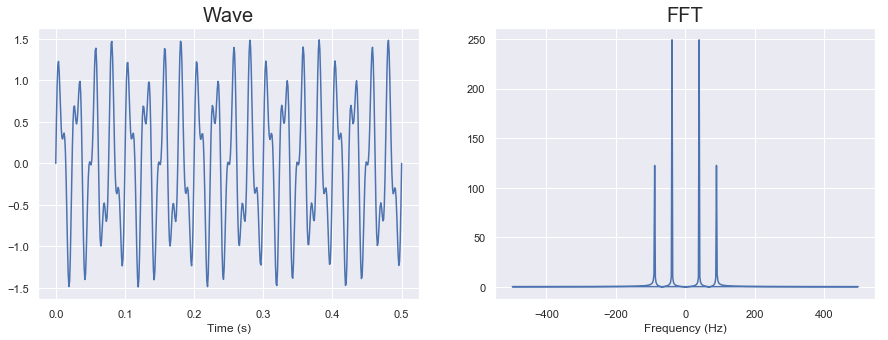

In [180]:
Fwave = np.fft.fft(wave)

n_pts = len(wave)
half_pts = n_pts // 2  # // is integer division
nyquist_freq_Hz = sample_freq_Hz / 2
freq_Hz = np.linspace(0, sample_freq_Hz, n_pts)
freq_Hz[half_pts:] -= sample_freq_Hz

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(time_s, wave)
plt.xlabel('Time (s)')
plt.title('Wave', fontsize=20);

plt.subplot(122)
plt.plot(freq_Hz, np.abs(Fwave))
plt.xlabel('Frequency (Hz)')
plt.title('FFT', fontsize=20);

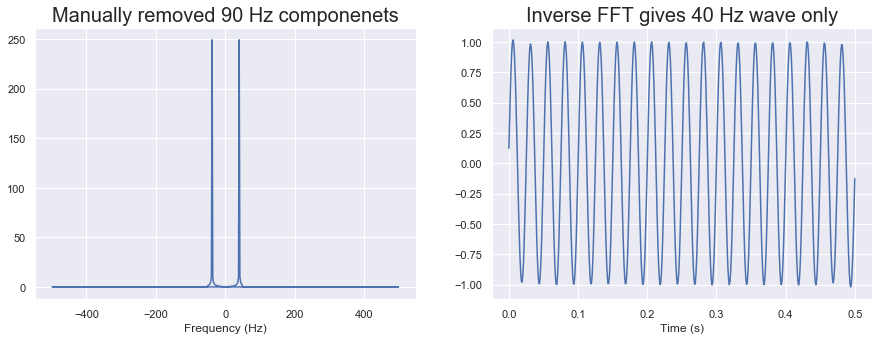

In [184]:
idx = np.where(np.abs(freq_Hz) > 50)[0]
Fwave[idx] = 0

wave2 = np.fft.ifft(Fwave)

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(freq_Hz, np.abs(Fwave))
plt.xlabel('Frequency (Hz)')
plt.title('Manually removed 90 Hz componenets', fontsize=20)

plt.subplot(122)
plt.plot(time_s, wave2)
plt.xlabel('Time (s)')
plt.title('Inverse FFT gives 40 Hz wave only', fontsize=20);

---
### An average EEG recording.

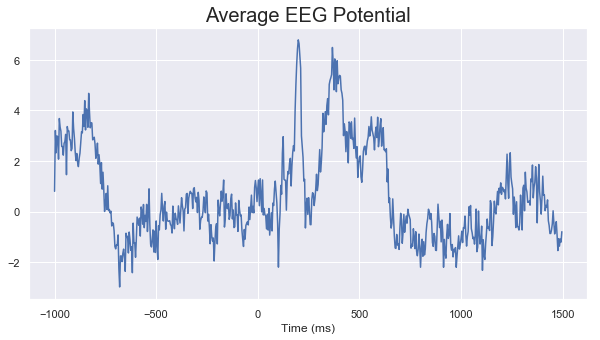

In [35]:
import pickle

with open("../lecture_25_time_series/eeg_data.dat", "rb") as f:
    time_ms, eeg = pickle.load(f)
    
plt.figure(figsize=(10, 5))
plt.plot(time_ms, eeg)
plt.xlabel('Time (ms)')
plt.title('Average EEG Potential', fontsize=20);

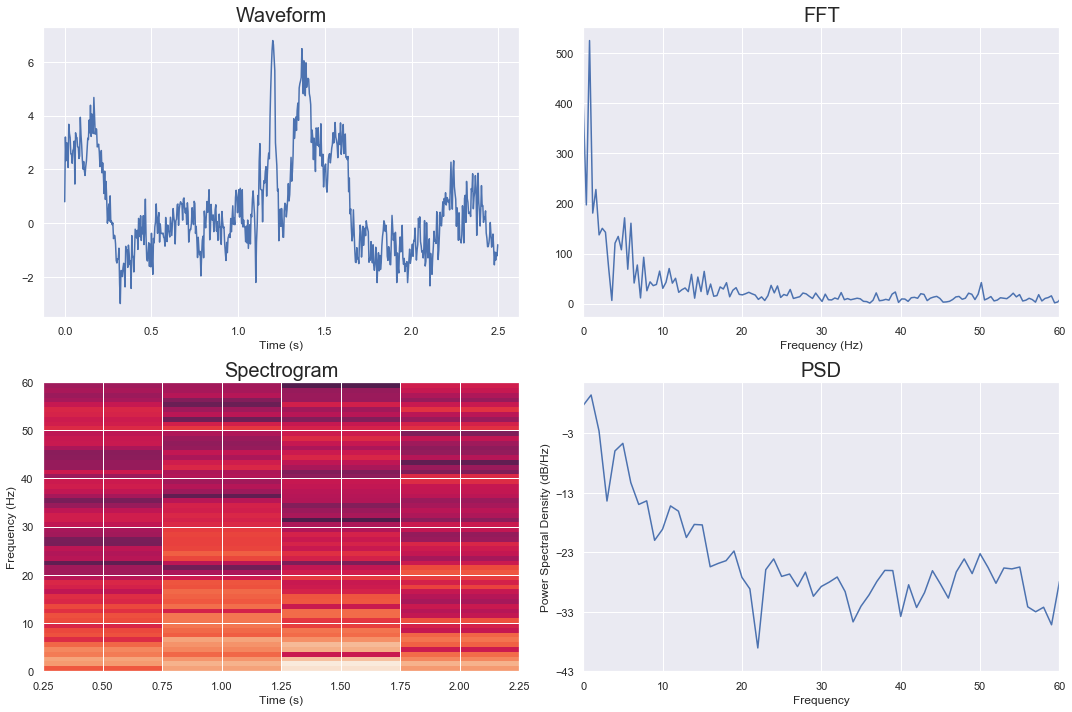

In [36]:
sample_interval_ms = time_ms[1] - time_ms[0]
sample_freq_kHz = 1 / sample_interval_ms

analyze_waveform(eeg, sample_freq_kHz * 1000, 60)

---
### White Noise

A sequence of completely random numbers with mean zero is white noise.

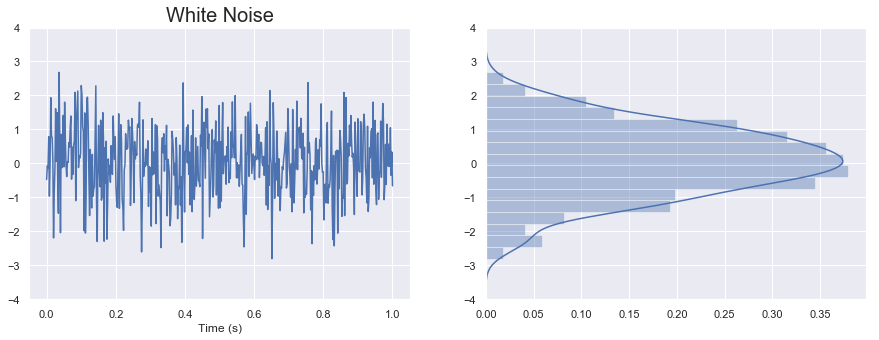

In [46]:
time_s = np.linspace(0, 1, 500)
whitenoise = np.random.randn(500)

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(time_s, whitenoise)
plt.ylim(-4, 4)
plt.xlabel('Time (s)')
plt.title('White Noise', fontsize=20)

plt.subplot(122)
sns.distplot(whitenoise, vertical=True, ax=plt.gca())
plt.ylim(-4, 4);

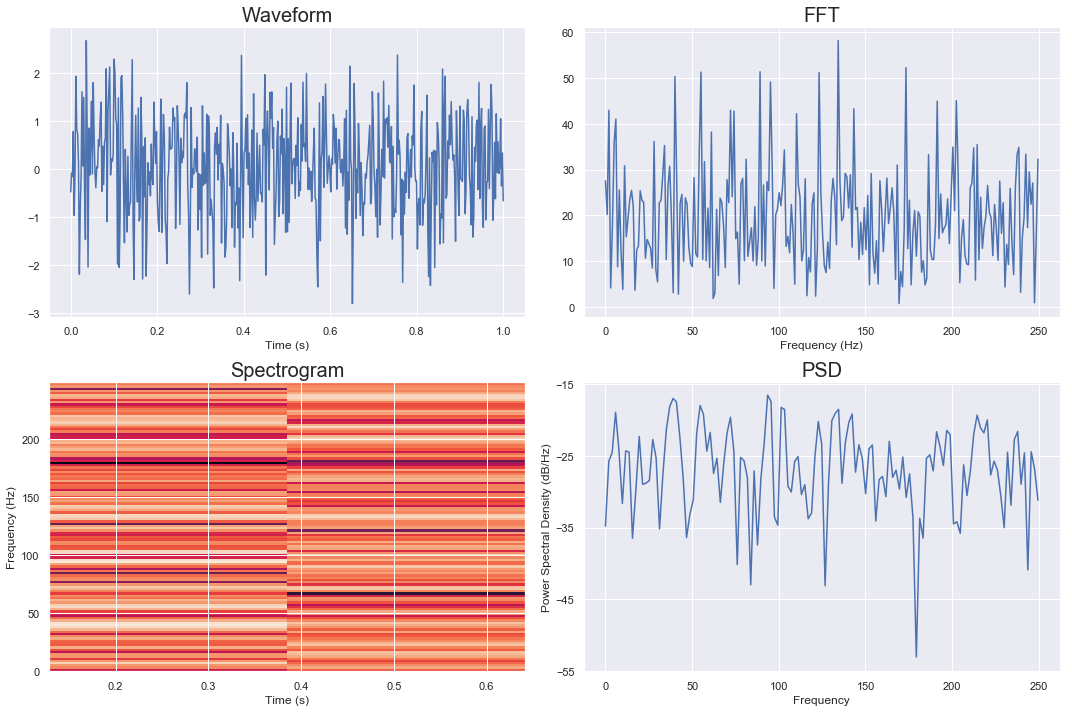

In [47]:
sample_interval_s = time_s[1] - time_s[0]
sample_freq_Hz = 1 / sample_interval_s

analyze_waveform(whitenoise, sample_freq_Hz)

---
### FFT of a square pulse.

![](square_sine_comps.png)

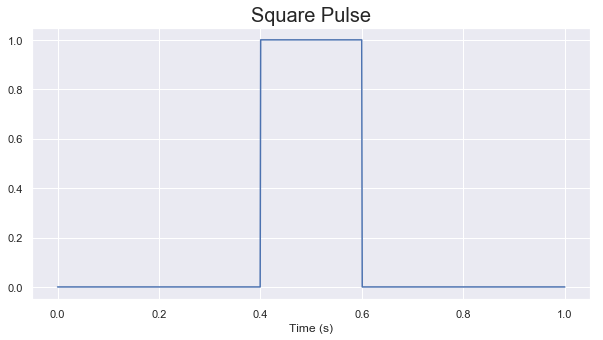

In [37]:
time_s = np.linspace(0, 1, 1000)

wave = np.zeros(time_s.shape)
wave[400:-400] = 1

plt.figure(figsize=(10, 5))
plt.plot(time_s, wave)
plt.xlabel('Time (s)')
plt.title('Square Pulse', fontsize=20);

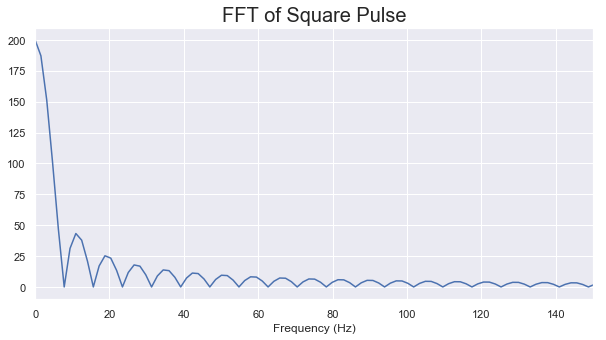

In [38]:
fft = np.fft.fft(wave)

sample_interval_s = time_s[1] - time_s[0]
sample_freq_Hz = 1 / sample_interval_s
nyquist_freq_Hz = sample_freq_Hz / 2
n_pts = eeg.shape[0]
half_pts = n_pts // 2  # // is integer division

# only look at first half of fft up to Nyquist frequency
fft = fft[:half_pts]
freq_Hz = np.linspace(0, nyquist_freq_Hz, half_pts)

plt.figure(figsize=(10, 5))
plt.plot(freq_Hz, np.abs(fft))
plt.xlim(0, 150)
plt.xlabel('Frequency (Hz)')
plt.title('FFT of Square Pulse', fontsize=20);

---
### FFT of a Gaussian is a Gaussian.

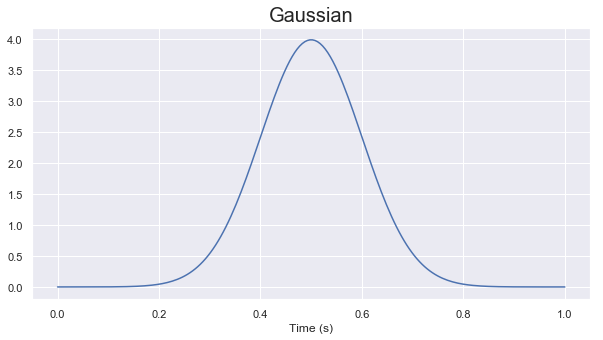

In [63]:
import scipy.stats as st

time_s = np.linspace(0, 1, 200)

gauss = st.norm.pdf(time_s - np.mean(time_s), 0, 0.1)

plt.figure(figsize=(10, 5))
plt.plot(time_s, gauss)
plt.xlabel('Time (s)')
plt.title('Gaussian', fontsize=20);

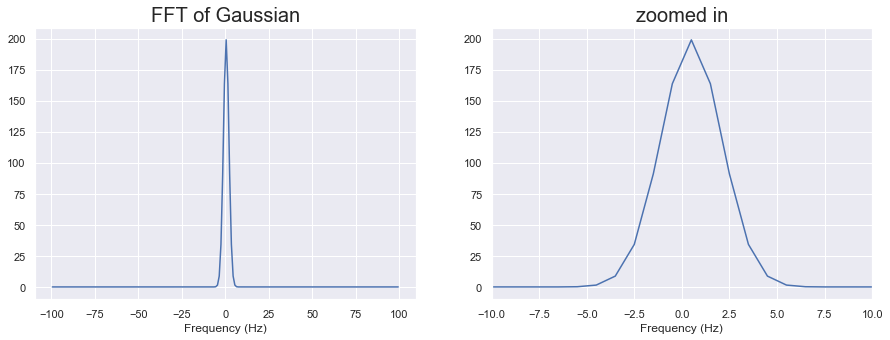

In [64]:
fft = np.fft.fft(gauss)
sfft = np.fft.fftshift(fft)

sample_interval_s = time_s[1] - time_s[0]
sample_freq_Hz = 1 / sample_interval_s
nyquist_freq_Hz = sample_freq_Hz / 2
n_pts = gauss.shape[0]
freq_Hz = np.linspace(-nyquist_freq_Hz, nyquist_freq_Hz, n_pts)

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(freq_Hz, np.abs(sfft))
plt.xlabel('Frequency (Hz)')
plt.title('FFT of Gaussian', fontsize=20)

plt.subplot(122)
plt.plot(freq_Hz, np.abs(sfft))
plt.xlim(-10, 10)
plt.xlabel('Frequency (Hz)')
plt.title('zoomed in', fontsize=20);

---
# Filtering

In [185]:
from scipy import signal

(256.0, 128.0)

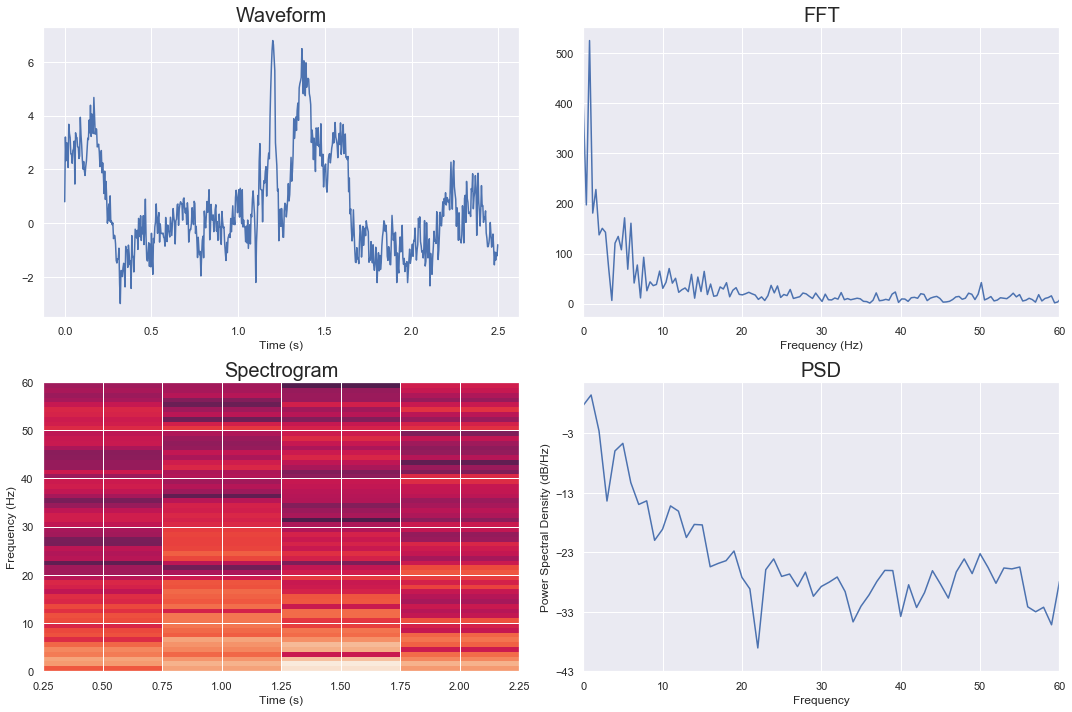

In [82]:
with open("../lecture_25_time_series/eeg_data.dat", "rb") as f:
    time_ms, eeg = pickle.load(f)

sample_interval_ms = time_ms[1] - time_ms[0]
sample_freq_kHz = 1 / sample_interval_ms
sample_freq_Hz = sample_freq_kHz * 1000
nyquist_freq_Hz = sample_freq_Hz / 2

analyze_waveform(eeg, sample_freq_Hz, 60)

sample_freq_Hz, nyquist_freq_Hz

### Lowpass finite impulse response (FIR) filter to remove frequencies above 30 Hz.

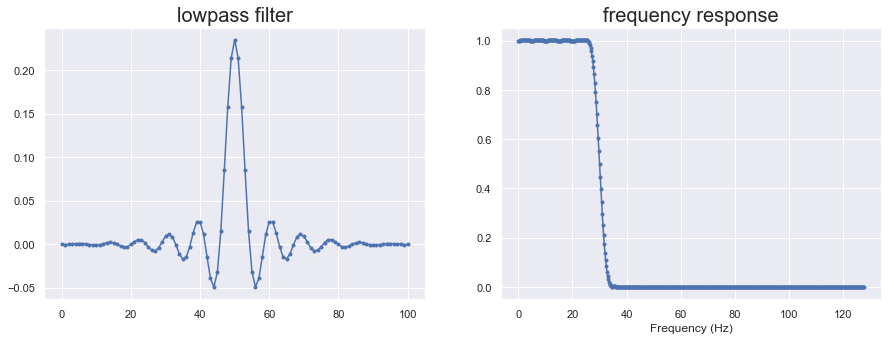

In [101]:
lowpass = signal.firwin(101, 30, nyq=nyquist_freq_Hz)

radians_per_sec, freq_response = signal.freqz(lowpass)

freq_Hz = radians_per_sec / (2 * np.pi) * sample_freq_Hz


plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(lowpass, '.-')
plt.title('lowpass filter', fontsize=20)

plt.subplot(122)
plt.plot(freq_Hz, np.abs(freq_response), '.-')
plt.xlabel('Frequency (Hz)')
plt.title('frequency response', fontsize=20);

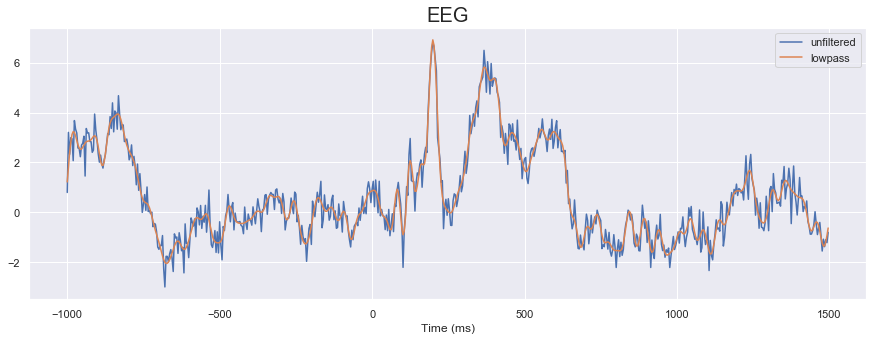

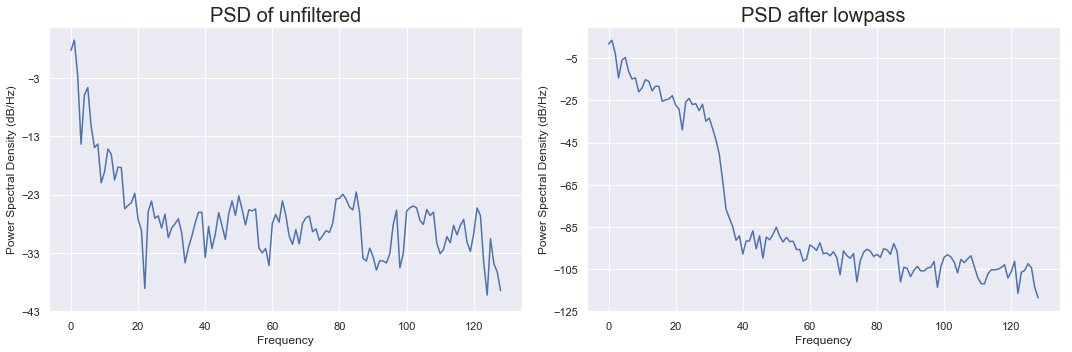

In [91]:
# filter (i.e. convolve) waveform with low-pass filter
eeg_lp = np.convolve(eeg, lowpass, 'same')

fig = plt.figure(figsize=(15, 5))

plt.plot(time_ms, eeg, label='unfiltered')
plt.plot(time_ms, eeg_lp, label='lowpass')
plt.xlabel('Time (ms)')
plt.title('EEG', fontsize=20)
plt.legend()

fig = plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.psd(eeg, Fs=sample_freq_Hz)
plt.title('PSD of unfiltered', fontsize=20)

plt.subplot(122)
plt.psd(eeg_lp, Fs=sample_freq_Hz)
plt.title('PSD after lowpass', fontsize=20)

fig.tight_layout();

### Highpass finite impulse response (FIR) filter to remove frequencies below 10 Hz.

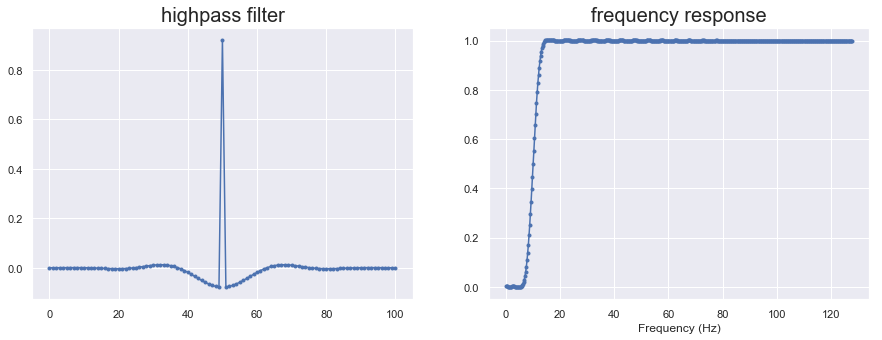

In [102]:
highpass = signal.firwin(101, 10, pass_zero=False, nyq=nyquist_freq_Hz)

radians_per_sec, freq_response = signal.freqz(highpass)

freq_Hz = radians_per_sec / (2 * np.pi) * sample_freq_Hz


plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(highpass, '.-')
plt.title('highpass filter', fontsize=20)

plt.subplot(122)
plt.plot(freq_Hz, np.abs(freq_response), '.-')
plt.xlabel('Frequency (Hz)')
plt.title('frequency response', fontsize=20);

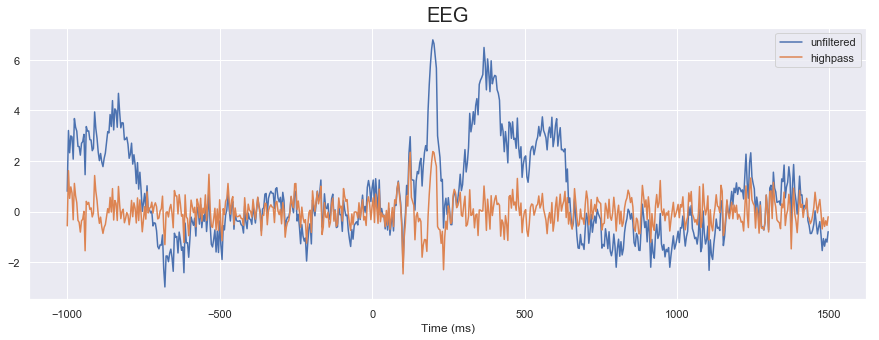

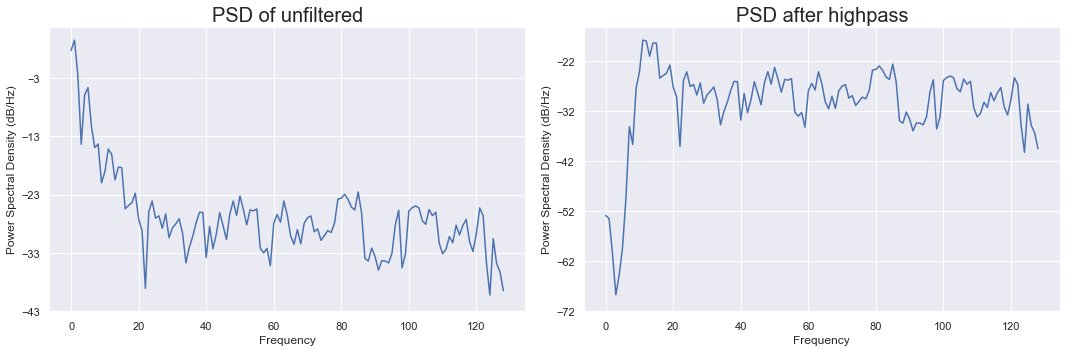

In [93]:
# filter (i.e. convolve) waveform with high-pass filter
eeg_hp = np.convolve(eeg, highpass, 'same')

fig = plt.figure(figsize=(15, 5))

plt.plot(time_ms, eeg, label='unfiltered')
plt.plot(time_ms, eeg_hp, label='highpass')
plt.xlabel('Time (ms)')
plt.title('EEG', fontsize=20)
plt.legend()

fig = plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.psd(eeg, Fs=sample_freq_Hz)
plt.title('PSD of unfiltered', fontsize=20)

plt.subplot(122)
plt.psd(eeg_hp, Fs=sample_freq_Hz)
plt.title('PSD after highpass', fontsize=20)

fig.tight_layout();

### Bandpass finite impulse response (FIR) filter to remove frequencies outside of 10-30 Hz.

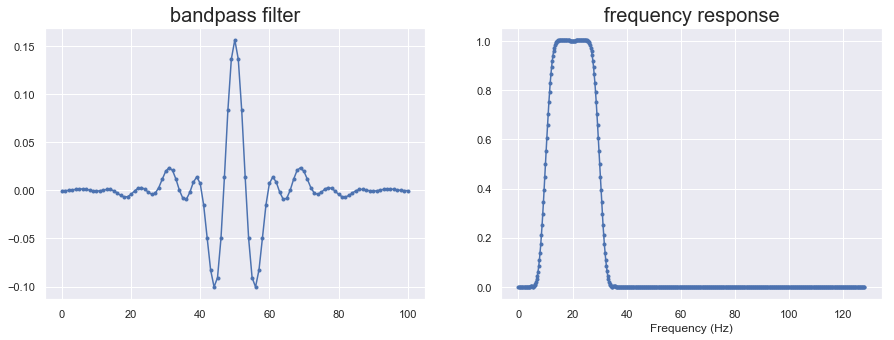

In [103]:
bandpass = signal.firwin(101, [10, 30], pass_zero=False, nyq=nyquist_freq_Hz)

radians_per_sec, freq_response = signal.freqz(bandpass)

freq_Hz = radians_per_sec / (2 * np.pi) * sample_freq_Hz


plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(bandpass, '.-')
plt.title('bandpass filter', fontsize=20)

plt.subplot(122)
plt.plot(freq_Hz, np.abs(freq_response), '.-')
plt.xlabel('Frequency (Hz)')
plt.title('frequency response', fontsize=20);

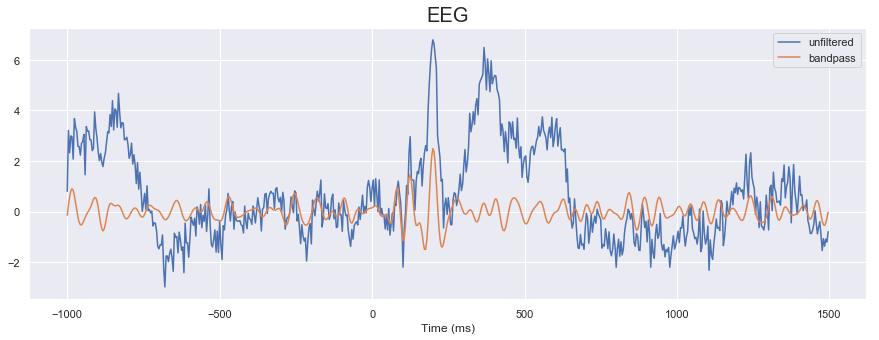

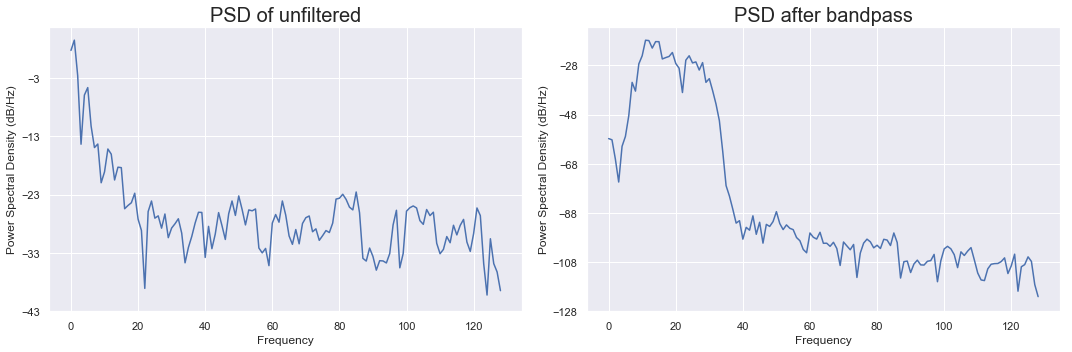

In [96]:
# filter (i.e. convolve) waveform with low-pass filter
eeg_bp = np.convolve(eeg, bandpass, 'same')

fig = plt.figure(figsize=(15, 5))

plt.plot(time_ms, eeg, label='unfiltered')
plt.plot(time_ms, eeg_bp, label='bandpass')
plt.xlabel('Time (ms)')
plt.title('EEG', fontsize=20)
plt.legend()

fig = plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.psd(eeg, Fs=sample_freq_Hz)
plt.title('PSD of unfiltered', fontsize=20)

plt.subplot(122)
plt.psd(eeg_bp, Fs=sample_freq_Hz)
plt.title('PSD after bandpass', fontsize=20)

fig.tight_layout();

---
### Fourier Transform and Convolution

* Convolution in the time domain corresponds to multiplication in the frequency domain.
* Convolution is an expensive computation.
* Thus, instead of convolving X and Y directly, one can multiply FFT(X) * FFT(Y), then inverse transform back to the time domain to achieve the convolution.
* Note, however, that $f$ and $g$ need to be the same length. If not, you can, for example, pad one with zeros.

### $f \circledast g = F^{-1}(F(f) * F(g))$

---
### Subsampling

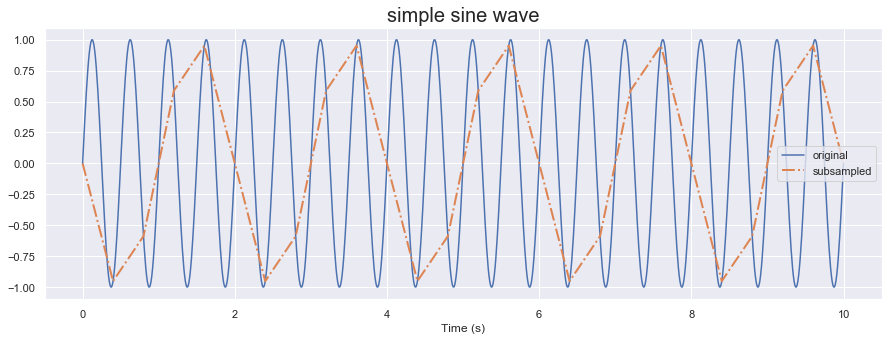

In [163]:
# nice simple sinusoidal waveform at one frequency
time_s = np.linspace(0, 10, 1001)

sin_freq_Hz = 2  # 2 cycles per second, 50 sample time points per cycle

wave = np.sin(2 * np.pi * sin_freq_Hz * time_s)

sample_interval_s = time_s[1] - time_s[0]
sample_freq_Hz = 1 / sample_interval_s
nyquist_freq_Hz = sample_freq_Hz / 2
n_pts = wave.shape[0]

# subsampled waveform
sub_time_s = time_s[::40]
sub_wave = wave[::40]

sub_sample_interval_s = sub_time_s[1] - sub_time_s[0]
sub_sample_freq_Hz = 1 / sub_sample_interval_s
sub_nyquist_freq_Hz = sub_sample_freq_Hz / 2

plt.figure(figsize=(15, 5))
plt.plot(time_s, wave, label='original')
plt.plot(sub_time_s, sub_wave, '-.', lw=2, label='subsampled')
plt.xlabel('Time (s)')
plt.title('simple sine wave', fontsize=20)
plt.legend();

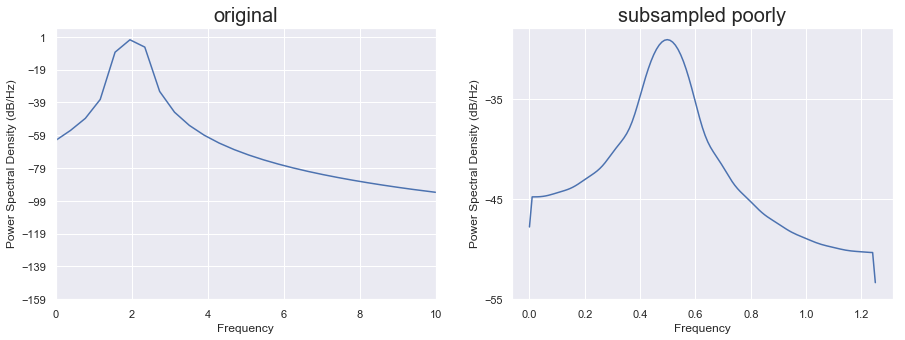

In [164]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.psd(wave, Fs=sample_freq_Hz)
plt.xlim(0, 10)
plt.title('original', fontsize=20)

plt.subplot(122)
plt.psd(sub_wave, Fs=sub_sample_freq_Hz)
plt.title('subsampled poorly', fontsize=20);

---
### Subsampling of a mixture of sine waves.

(1000.0, 500.0)

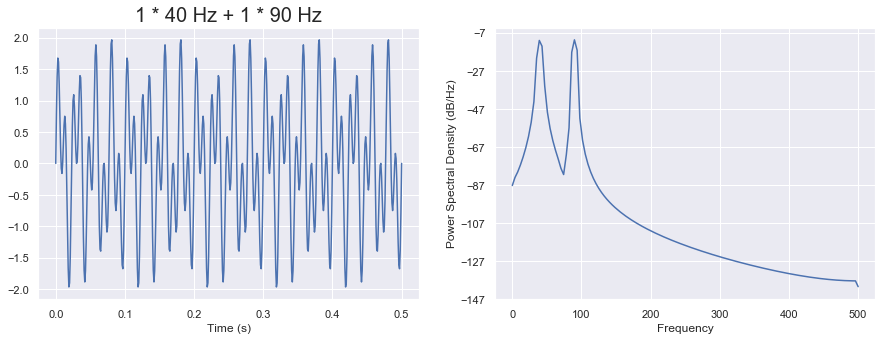

In [165]:
time_s = np.linspace(0, 0.5, 501)
f1_Hz = 40
f2_Hz = 90
A1 = 1
A2 = 1
wave = A1 * np.sin(2 * np.pi * f1_Hz * time_s) + A2 * np.sin(2 * np.pi * f2_Hz * time_s)

sample_interval_s = time_s[1] - time_s[0]
sample_freq_Hz = 1 / sample_interval_s
nyquist_freq_Hz = sample_freq_Hz / 2

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(time_s, wave)
plt.xlabel('Time (s)')
plt.title(f'{A1} * {f1_Hz} Hz + {A2} * {f2_Hz} Hz', fontsize=20)

plt.subplot(122)
plt.psd(wave, Fs=sample_freq_Hz)

sample_freq_Hz, nyquist_freq_Hz

(100.0, 50.0)

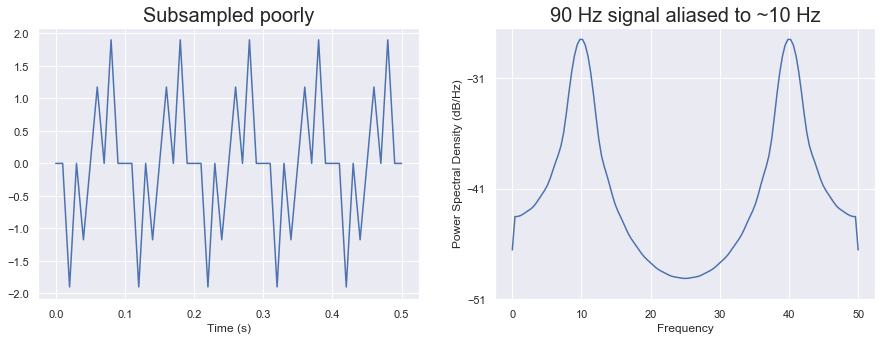

In [166]:
# subsampled waveform
sub_time_s = time_s[::10]
sub_wave = wave[::10]

sub_sample_interval_s = sub_time_s[1] - sub_time_s[0]
sub_sample_freq_Hz = 1 / sub_sample_interval_s
sub_nyquist_freq_Hz = sub_sample_freq_Hz / 2

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(sub_time_s, sub_wave)
plt.xlabel('Time (s)')
plt.title('Subsampled poorly', fontsize=20)

plt.subplot(122)
plt.psd(sub_wave, Fs=sub_sample_freq_Hz)
plt.title('90 Hz signal aliased to ~10 Hz', fontsize=20)

sub_sample_freq_Hz, sub_nyquist_freq_Hz

---
### Filter, then subsample.

(100.0, 50.0)

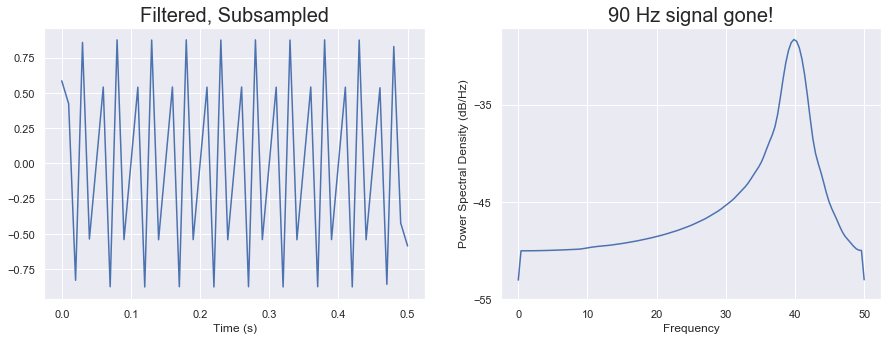

In [167]:
# lowpass filter below 50 Hz
lowpass = signal.firwin(101, 50, nyq=nyquist_freq_Hz)
fwave = np.convolve(wave, lowpass, 'same')

# subsampled filtered waveform
sub_time_s = time_s[::10]
sub_fwave = fwave[::10]

sub_sample_interval_s = sub_time_s[1] - sub_time_s[0]
sub_sample_freq_Hz = 1 / sub_sample_interval_s
sub_nyquist_freq_Hz = sub_sample_freq_Hz / 2

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(sub_time_s, sub_fwave)
plt.xlabel('Time (s)')
plt.title('Filtered, Subsampled', fontsize=20)

plt.subplot(122)
plt.psd(sub_fwave, Fs=sub_sample_freq_Hz)
plt.title('90 Hz signal gone!', fontsize=20)

sub_sample_freq_Hz, sub_nyquist_freq_Hz

(100.0, 50.0)

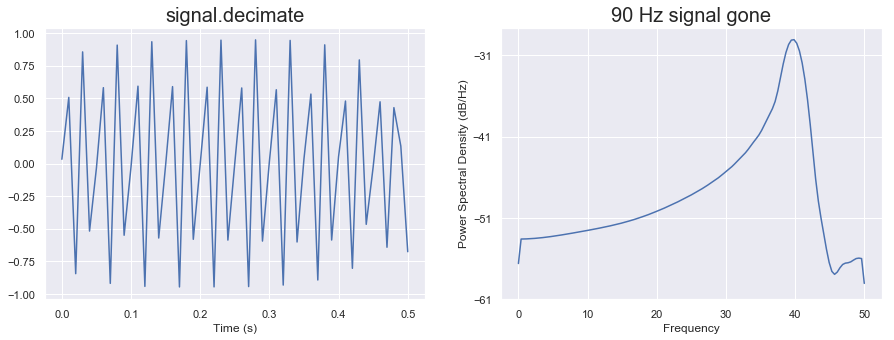

In [168]:
# subsampled filtered waveform
sub_time_s = time_s[::10]
sub_fwave = signal.decimate(wave, 10)

sub_sample_interval_s = sub_time_s[1] - sub_time_s[0]
sub_sample_freq_Hz = 1 / sub_sample_interval_s
sub_nyquist_freq_Hz = sub_sample_freq_Hz / 2

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(sub_time_s, sub_fwave)
plt.xlabel('Time (s)')
plt.title('signal.decimate', fontsize=20)

plt.subplot(122)
plt.psd(sub_fwave, Fs=sub_sample_freq_Hz)
plt.title('90 Hz signal gone', fontsize=20)

sub_sample_freq_Hz, sub_nyquist_freq_Hz

---
### Subsample EEG recording.

(256.0, 128.0)

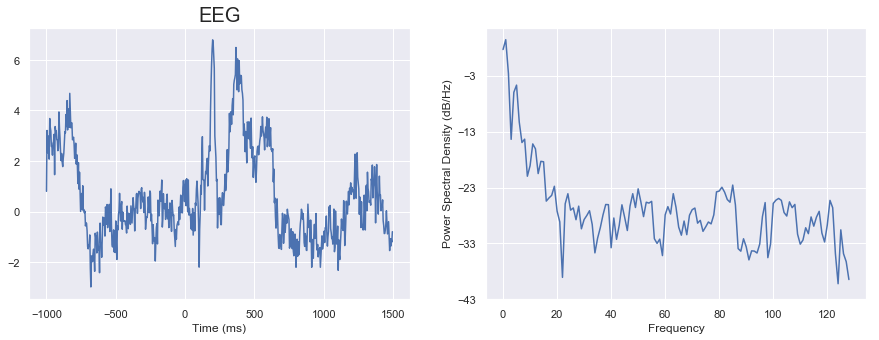

In [171]:
with open("../lecture_25_time_series/eeg_data.dat", "rb") as f:
    time_ms, eeg = pickle.load(f)

sample_interval_ms = time_ms[1] - time_ms[0]
sample_freq_kHz = 1 / sample_interval_ms
sample_freq_Hz = sample_freq_kHz * 1000
nyquist_freq_Hz = sample_freq_Hz / 2

fig = plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(time_ms, eeg)
plt.xlabel('Time (ms)')
plt.title('EEG', fontsize=20)

plt.subplot(122)
plt.psd(eeg, Fs=sample_freq_Hz)

sample_freq_Hz, nyquist_freq_Hz

(51.2, 25.6)

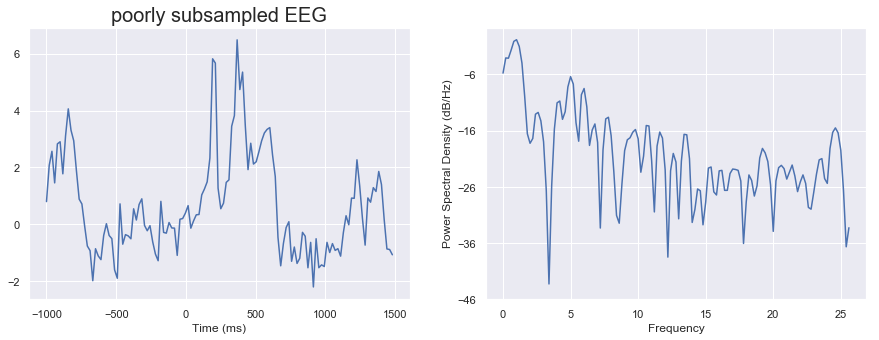

In [172]:
# subsample at 51.2 Hz
sub_time_ms = time_ms[::5]
sub_eeg = eeg[::5]

sub_sample_interval_ms = sub_time_ms[1] - sub_time_ms[0]
sub_sample_freq_kHz = 1 / sub_sample_interval_ms
sub_sample_freq_Hz = sub_sample_freq_kHz * 1000
sub_nyquist_freq_Hz = sub_sample_freq_Hz / 2

fig = plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(sub_time_ms, sub_eeg)
plt.xlabel('Time (ms)')
plt.title('poorly subsampled EEG', fontsize=20)

plt.subplot(122)
plt.psd(sub_eeg, Fs=sub_sample_freq_Hz)

sub_sample_freq_Hz, sub_nyquist_freq_Hz

(51.2, 25.6)

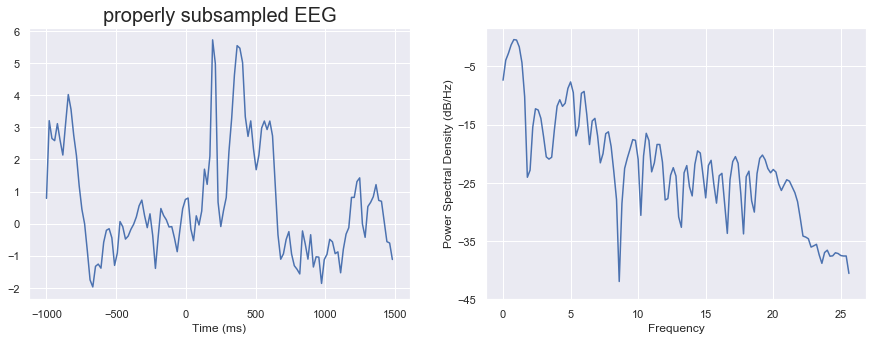

In [173]:
# properly subsample at 51.2 Hz
sub_time_ms = time_ms[::5]
sub_eeg = signal.decimate(eeg, 5)

sub_sample_interval_ms = sub_time_ms[1] - sub_time_ms[0]
sub_sample_freq_kHz = 1 / sub_sample_interval_ms
sub_sample_freq_Hz = sub_sample_freq_kHz * 1000
sub_nyquist_freq_Hz = sub_sample_freq_Hz / 2

fig = plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(sub_time_ms, sub_eeg)
plt.xlabel('Time (ms)')
plt.title('properly subsampled EEG', fontsize=20)

plt.subplot(122)
plt.psd(sub_eeg, Fs=sub_sample_freq_Hz)

sub_sample_freq_Hz, sub_nyquist_freq_Hz

---
### Subsampling and Aliasing in 2D Images.

![](image_aliasing.png)

Image from Alex Huth's lecture slides.